<h1 style="font-family:Robotto;"> <center>🏥 Hybrid Approach to Hospital Appointment Cancellation 🏥</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Mohammed Luqman Farhat Rumaiz - 2018130</center></p>

<p>
    Hey I am Luqman 👋, today we will be attempting to predict hospital appointment cancellations. The dataset used contains information about appointments for people who have a reservation at a hotel, and who may or may not show up for their scheduled booking. We will be using this data to identify patterns in which guests are more likely to cancel their appointments and to make predictions about which bookings are likely to be cancelled. By understanding these patterns, we can better manage our hotel operations and improve our customer service.  
<p>
Here is the <a src="https://www.kaggle.com/datasets/joniarroba/noshowappointments">🔗 Dataset </a>, it is from Brazil.

<b>Reference to Joni Hoppen and <a src="https://www.linkedin.com/company/aquare-la/">Aquarela Analytics</a></b>

<h3>Data Dictionary (As provided by the publisher of the Dataset)</h3>

<table style="border:border: 1px solid white; ">
    <tr>
        <th>PatientId</th>
        <th>AppointmentID</th>
        <th>Gender</th>
        <th>ScheduledDay</th>
        <th>AppointmentDay</th>
        <th>Age</th>
        <th>Neighbourhood</th>
        <th>Scholarship</th>
        <th>Hipertension</th>
        <th>Diabetes</th> 
        <th>Alcoholism</th>
        <th>Handcap</th>
        <th>SMS_received</th>
        <th>No-show</th>
    </tr>
    <tr>
        <td>Identification of a patient</td>
        <td>Identification of each appointment</td>
        <td>Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.</td>
        <td>The day of the actual appointment, when they have to visit the doctor.</td>
        <td>The day someone called or registered the appointment, this is before appointment of course.</td>
        <td>How old is the patient.</td>
        <td>Where the appointment takes place.</td>
        <td>True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia</td>
        <td>True or False</td>
        <td>True or False</td>
        <td>True or False</td>
        <td>True or False</td>
        <td>1 or more messages sent to the patient.</td>
        <td>True or False</td>
    </tr>
</table>

In [69]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

<h3>Data Wrangling</h3>
<br>

In [70]:
# Reading the dataset and showing the 1st 5 rows

df = pd.read_csv('dataset-noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [71]:
# Amount of rows in the dataset

df.shape

(110527, 14)

In [72]:
# Data types of each column, the numerical values are fine as they aren't stored in a string format 

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [73]:
# Checking for null values, there seems to be no null fields

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [74]:
# Looking for duplicate rows

df[df.duplicated()].shape

(0, 14)

In [75]:
# Trying to explore the dataset, the data looks great with no nulls. However a few odd values for ages that are below
# 0 appear, and even 

for col in df.columns[2:]:
    print(col)
    print(df[col].unique())

Gender
['F' 'M']
ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7 

In [76]:
# The mean age of alcohol consumption ranged from 14-17 in Brazil (Patterns of alcohol use among Brazilian adolescents [https://www.scielo.br/j/rbp/a/rsHyR7TV7dxqpGrrmz5csNg/#])
# therefore ages less than this will be removed as it seems like very extreme cases

filter = (df.Age < 14) & (df.Alcoholism == 1)
df[filter].count()

PatientId         15
AppointmentID     15
Gender            15
ScheduledDay      15
AppointmentDay    15
Age               15
Neighbourhood     15
Scholarship       15
Hipertension      15
Diabetes          15
Alcoholism        15
Handcap           15
SMS_received      15
No-show           15
dtype: int64

In [77]:
# There are people in Brazil who do exist above 100, but those are some rare cases. The oldest age in this dataset is 115 and
# the median between the average life expectancy and the max age is 82, however to consider them as outlires is unreasonable
# as of course such elderly people do exist in socities around the world and there are 2026 rows. Since these are natural
# variations, lets just take ages over 95 to be outliers

print(df['Age'].max())
print(df[df['Age'] > 76]['Age'].median())

print('\n')
print(df[df['Age'] > 82].count())

115
82.0


PatientId         2026
AppointmentID     2026
Gender            2026
ScheduledDay      2026
AppointmentDay    2026
Age               2026
Neighbourhood     2026
Scholarship       2026
Hipertension      2026
Diabetes          2026
Alcoholism        2026
Handcap           2026
SMS_received      2026
No-show           2026
dtype: int64


In [84]:


print(df[df['Age'] > 95].count())

print(df[df['Age'] < 0].count())

PatientId         46
AppointmentID     46
Gender            46
ScheduledDay      46
AppointmentDay    46
Age               46
Neighbourhood     46
Scholarship       46
Hipertension      46
Diabetes          46
Alcoholism        46
Handcap           46
SMS_received      46
No-show           46
dtype: int64
PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64


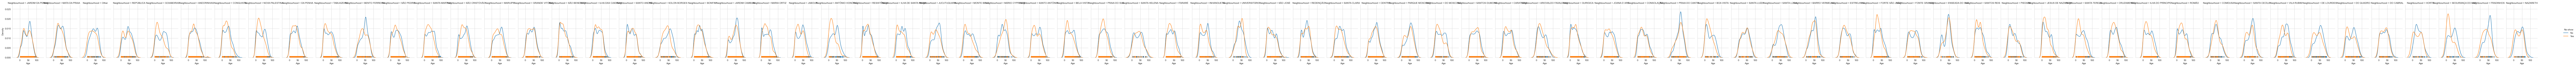

In [82]:
less_than_100 = ['MORADA DE CAMBURI', 'PONTAL DE CAMBURI', 'ILHA DO BOI', 'ILHA DO FRADE', 
                 'AEROPORTO', 'ILHAS OCEÂNICAS DE TRINDADE', 'PARQUE INDUSTRIAL']

df['Neighbourhood'] = np.where(df['Neighbourhood'].isin(df['Neighbourhood'].value_counts()[df['Neighbourhood'].value_counts() < 100].index), 'Other', df['Neighbourhood'])

g = sns.FacetGrid(df, col="Neighbourhood", 
                  col_wrap=4, height=3, 
                  hue='No-show')

g.map(quantile_plot, "Age").add_legend();
g.set_titles('{col_name}')
plt.show()

<h2 style="font-family:Robotto;">1. EDA (Explorary Data Analysis) 🧪</h2>
<br>

EDA allows us to identify patterns in the data that may lead to insights that can be used to improve the accuracy of the prediction model. Additionally, EDA can also help us to identify potential sources of bias or noise that could adversely affect the model accuracy. By performing EDA on the data set, we can create a better understanding of the structure of the data and uncover potential relationships between the independent and response variables.

In [ ]:
# Finding out the number of Outcomes for Non-Recur and Recur - N = 151, R = 47

ax = sns.countplot(df["No-show"],label="No-show")
df["No-show"].value_counts()

In [ ]:
df